# Introduction aux Transformers avec Hugging Face

Ce notebook constitue mon premier pas dans l'apprentissage des modèles de Transformers avec la bibliothèque Hugging Face. Il explore les concepts fondamentaux et présente quelques exemples d'utilisation pratique.

## Objectifs
- Comprendre l'architecture des modèles Transformers
- Explorer la bibliothèque Hugging Face
- Apprendre à utiliser des modèles pré-entraînés pour des tâches simples


## 1. Installation des bibliothèques nécessaires

In [2]:
# Installation des packages nécessaires
!pip install transformers datasets evaluate torch tiktoken protobuf sentencepiece

## 2. Importation des bibliothèques

In [3]:
import torch
from transformers import AutoTokenizer, AutoModel, pipeline
import numpy as np
import matplotlib.pyplot as plt

## 3. Les pipelines : une façon simple d'utiliser les modèles pré-entraînés

Les pipelines sont la façon la plus simple d'utiliser les modèles pré-entraînés pour les tâches courantes de NLP.

In [9]:
# Exemple 1 : Analyse de sentiment
# Utilisons un modèle spécifique pour le français
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Testons avec quelques phrases
texts = [
    "J'ai adoré cet article, il est très bien écrit et informatif.",
    "Ce contenu est décevant et ne répond pas à mes attentes.",
    "L'article est intéressant mais manque de profondeur sur certains aspects."
]

for text in texts:
    result = sentiment_analyzer(text)[0]
    print(f"Texte: {text}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}\n")

Device set to use cpu


Texte: J'ai adoré cet article, il est très bien écrit et informatif.
Sentiment: 5 stars, Score: 0.6765

Texte: Ce contenu est décevant et ne répond pas à mes attentes.
Sentiment: 1 star, Score: 0.4913

Texte: L'article est intéressant mais manque de profondeur sur certains aspects.
Sentiment: 3 stars, Score: 0.7248



In [8]:
# Exemple 2 : Génération de texte
# Utilisons un modèle spécifique pour le français
text_generator = pipeline("text-generation", model="bigscience/bloom-560m")

prompt = "Dans le monde des médias numériques, l'intelligence artificielle"
generated_text = text_generator(
    prompt,
    max_length=50,
    num_return_sequences=1,
    truncation=True,
    # Paramètres pour réduire les répétitions
    no_repeat_ngram_size=2,
    repetition_penalty=1.5,
    temperature=0.7
)
print("Texte généré:")
print(generated_text[0]['generated_text'])

Device set to use cpu
/home/ldiaby/projects/llm-learning-journey/.venv/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Texte généré:
Dans le monde des médias numériques, l'intelligence artificielle est devenue une réalité. Elle permet de transformer les données en informations pertinentes et utiles pour la prise d'initiatives.
La technologie blockchain a été développée par un groupe d'industriels américains qui ont créé leur propre


In [4]:
# Exemple 3 : Question-Réponse avec un modèle multilingue
# Utilisons un modèle plus simple qui fonctionne bien avec le français
qa_pipeline = pipeline(
    "question-answering",
    model="deepset/xlm-roberta-base-squad2"  # Modèle multilingue qui supporte le français
)

context = """
Le Figaro est un journal français fondé en 1826 sous le règne de Charles X. 
Il est à ce titre le plus ancien quotidien français encore publié. 
Il a été nommé d'après le personnage de Figaro, protagoniste du Barbier de Séville et 
du Mariage de Figaro de Beaumarchais. En 2022, Le Figaro est le premier quotidien national 
en termes de diffusion, avec 370 000 exemplaires diffusés par jour en moyenne.
"""

questions = [
    "Quand a été fondé Le Figaro ?",
    "D'où vient le nom du journal ?",
    "Quel est le tirage quotidien du Figaro en 2022 ?"
]

for question in questions:
    result = qa_pipeline(question=question, context=context)
    print(f"Question: {question}")
    print(f"Réponse: {result['answer']}")
    print(f"Score: {result['score']:.4f}\n")

config.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Question: Quand a été fondé Le Figaro ?
Réponse:  1826
Score: 0.9375

Question: D'où vient le nom du journal ?
Réponse:  le personnage de Figaro,
Score: 0.2730

Question: Quel est le tirage quotidien du Figaro en 2022 ?
Réponse:  370 000 exemplaires
Score: 0.3407



## 4. Comprendre les tokenizers

Les tokenizers sont essentiels dans le traitement du langage naturel. Ils convertissent le texte en tokens qui peuvent être traités par les modèles.

In [5]:
# Chargement d'un tokenizer adapté au français
tokenizer = AutoTokenizer.from_pretrained("camembert-base")

# Tokenization d'une phrase en français
text = "Comment les modèles de langage transforment-ils l'industrie des médias ?"
encoded_input = tokenizer(text, return_tensors="pt")

print("Input IDs (représentation numérique des tokens):")
print(encoded_input["input_ids"])

print("\nTokens décodés:")
tokens = tokenizer.convert_ids_to_tokens(encoded_input["input_ids"][0])
print(tokens)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

Input IDs (représentation numérique des tokens):
tensor([[    5,   841,    19,  1501,     8,  3015, 21981,    26,   240,    17,
            11,  2297,    20,  1729,   106,     6]])

Tokens décodés:
['<s>', '▁Comment', '▁les', '▁modèles', '▁de', '▁langage', '▁transforment', '-', 'ils', '▁l', "'", 'industrie', '▁des', '▁médias', '▁?', '</s>']


## 5. Explorer les embeddings des modèles

Les embeddings sont des représentations vectorielles des mots ou phrases qui capturent leur signification sémantique.

In [6]:
# Chargement d'un modèle adapté au français
model = AutoModel.from_pretrained("camembert-base")

# Générer des embeddings pour quelques phrases en français
sentences = [
    "Les articles de presse doivent être informatifs.",
    "Le journalisme nécessite de l'objectivité.",
    "Les médias numériques transforment l'industrie de la presse.",
    "La technologie change notre façon de consommer l'information.",
    "Les chats sont des animaux domestiques populaires."
]

# Fonction pour obtenir les embeddings d'une phrase
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Utiliser l'embedding du token [CLS] comme représentation de la phrase
    return outputs.last_hidden_state[:, 0, :].numpy()

# Calculer les embeddings
embeddings = [get_embedding(sentence) for sentence in sentences]
embeddings = [embedding.flatten() for embedding in embeddings]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

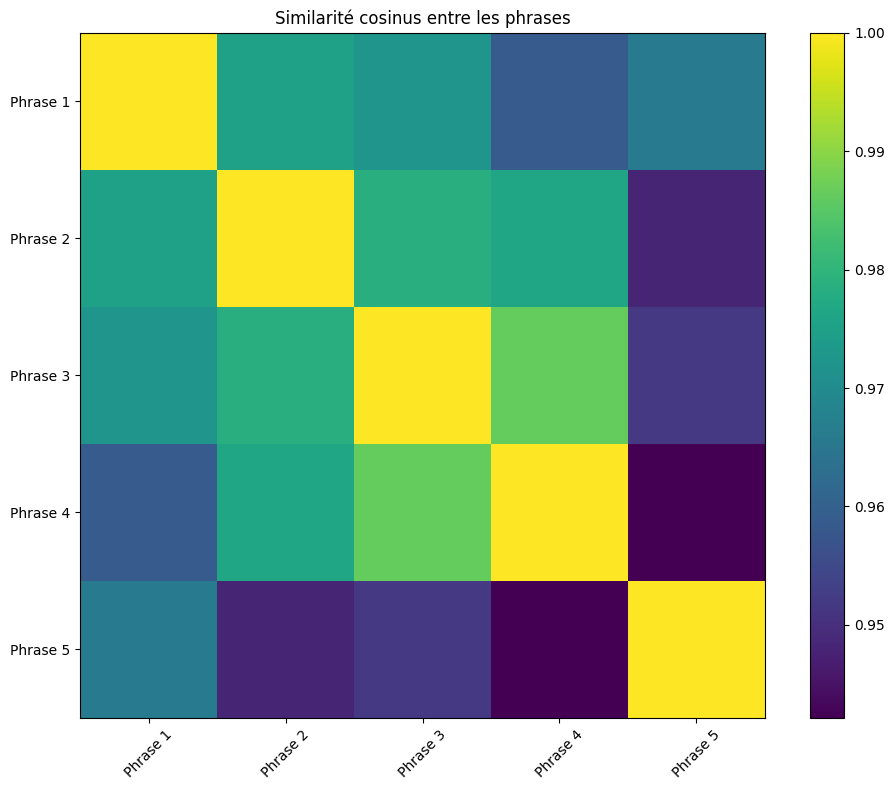

Phrase 1: Les articles de presse doivent être informatifs.
Phrase 2: Le journalisme nécessite de l'objectivité.
Phrase 3: Les médias numériques transforment l'industrie de la presse.
Phrase 4: La technologie change notre façon de consommer l'information.
Phrase 5: Les chats sont des animaux domestiques populaires.

Matrice de similarité:
Similarité entre Phrase 1 et Phrase 2: 0.9753
Similarité entre Phrase 1 et Phrase 3: 0.9722
Similarité entre Phrase 1 et Phrase 4: 0.9588
Similarité entre Phrase 1 et Phrase 5: 0.9658
Similarité entre Phrase 2 et Phrase 3: 0.9785
Similarité entre Phrase 2 et Phrase 4: 0.9761
Similarité entre Phrase 2 et Phrase 5: 0.9481
Similarité entre Phrase 3 et Phrase 4: 0.9862
Similarité entre Phrase 3 et Phrase 5: 0.9518
Similarité entre Phrase 4 et Phrase 5: 0.9422


In [7]:
# Calculer la similarité cosinus entre les embeddings
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

# Afficher la matrice de similarité
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Similarité cosinus entre les phrases')
plt.xticks(range(len(sentences)), [f"Phrase {i+1}" for i in range(len(sentences))], rotation=45)
plt.yticks(range(len(sentences)), [f"Phrase {i+1}" for i in range(len(sentences))])
plt.tight_layout()
plt.show()

# Afficher les phrases et leurs similarités
for i, sentence1 in enumerate(sentences):
    print(f"Phrase {i+1}: {sentence1}")
    
print("\nMatrice de similarité:")
for i, sentence1 in enumerate(sentences):
    for j, sentence2 in enumerate(sentences):
        if i < j:  # Pour éviter les duplications
            print(f"Similarité entre Phrase {i+1} et Phrase {j+1}: {similarity_matrix[i][j]:.4f}")

## 6. Conclusion et Réflexions

Dans ce notebook, j'ai exploré les bases des Transformers avec Hugging Face, en me concentrant particulièrement sur l'utilisation de modèles adaptés au français. J'ai pu utiliser des pipelines pour diverses tâches de NLP, comprendre le fonctionnement des tokenizers et explorer les embeddings générés par ces modèles.

### Ce que j'ai appris :
- Les pipelines facilitent grandement l'utilisation des modèles pré-entraînés
- Il est important de choisir des modèles adaptés à la langue traitée (français dans ce cas)
- Les tokenizers jouent un rôle crucial dans la conversion du texte en données numériques
- Les embeddings capturent la sémantique des phrases, permettant de mesurer leur similarité

### Prochaines étapes :
- Explorer la classification de texte avec les Transformers
- Apprendre à fine-tuner des modèles pour des tâches spécifiques
- Approfondir ma compréhension de l'architecture des Transformers
- Explorer davantage les modèles spécifiques au français comme CamemBERT

Ce notebook marque le début de mon parcours d'apprentissage des LLM, et je suis impatient de continuer à explorer ce domaine fascinant.